In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import torch 
from Curriculum import Curriculum
from GenerateDataCurriculum import GenerateDataCurriculum
from GenerateDataLM_Examples import make_lm_program_gamma_gamma_batched

In [17]:
N = 100
N_EPOCHS = 100
N_SAMPLES_PER_EPOCH = 1_000
BATCH_SIZE = 256
N_BATCHES_PER_EPOCH = N_SAMPLES_PER_EPOCH // BATCH_SIZE

In [18]:
N_SAMPLES_PER_EPOCH * N_EPOCHS - N_BATCHES_PER_EPOCH * BATCH_SIZE * N_EPOCHS

23200

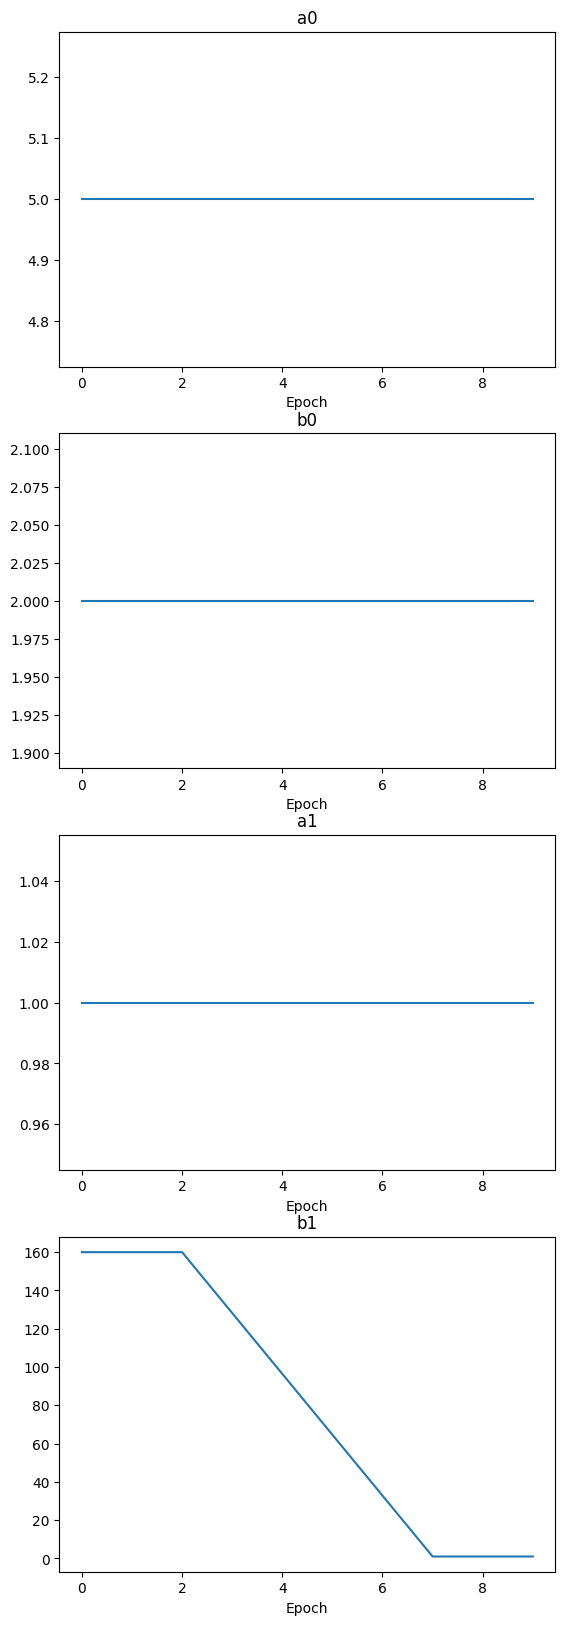

In [19]:
curriculum = Curriculum(max_iter=N_EPOCHS*N_SAMPLES_PER_EPOCH)
curriculum.add_param_list(
    [
    ("a0", curriculum.constant_scheduler(5.0)),
    ("b0", curriculum.constant_scheduler(2.0)),
    ("a1", curriculum.exponential_scheduler(1, 1)),
    ("b1", curriculum.constant_than_linear_than_constant_scheduler(160, 1, fraction_constant_beginning=0.2, fraction_constant_end=0.3))
    #("b1", curriculum.linear_scheduler(160, 1))
    ]
)
curriculum.plot_all_schedules_epochs(n_epochs=10)

In [20]:
curriculum.get_params(0)

{'a0': 5.0, 'b0': 2.0, 'a1': 1.0, 'b1': 160}

In [21]:
curriculum.get_params(N_SAMPLES_PER_EPOCH*N_EPOCHS-1)

{'a0': 5.0, 'b0': 2.0, 'a1': 1.0, 'b1': 1}

In [22]:
data_generator = GenerateDataCurriculum(
    pprogram_maker=make_lm_program_gamma_gamma_batched,
    curriculum= curriculum
)

####################################################################################################
Epoch 0


100%|██████████| 500/500 [00:04<00:00, 114.32it/s]


{'X': {'mean': tensor(0.5000), 'variance': tensor(0.0833), 'min': tensor(0.), 'max': tensor(1.0000)}, 'y': {'mean': tensor(-0.0040), 'variance': tensor(2.5081), 'min': tensor(-13.0310), 'max': tensor(13.7355)}, 'beta': {'mean': tensor([-0.0045,  0.0014, -0.0058]), 'variance': tensor([2.5010, 2.5201, 2.4909]), 'min': tensor([-9.2006, -8.0158, -8.1278]), 'max': tensor([10.5642,  9.0380,  8.7164])}}
Statistics for sigma_squared:
Mean: 0.006248272489756346
Variance: 3.871211811201647e-05
Min: 2.0607562589702866e-07
Max: 0.07501708716154099


Statistics for beta_var:
Mean: 2.4983506202697754
Variance: 1.2591313123703003
Min: 0.12051224708557129
Max: 11.993895530700684




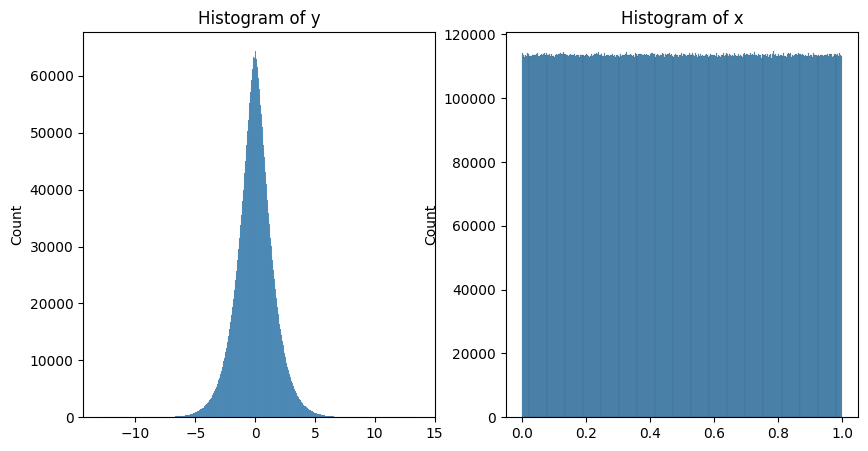

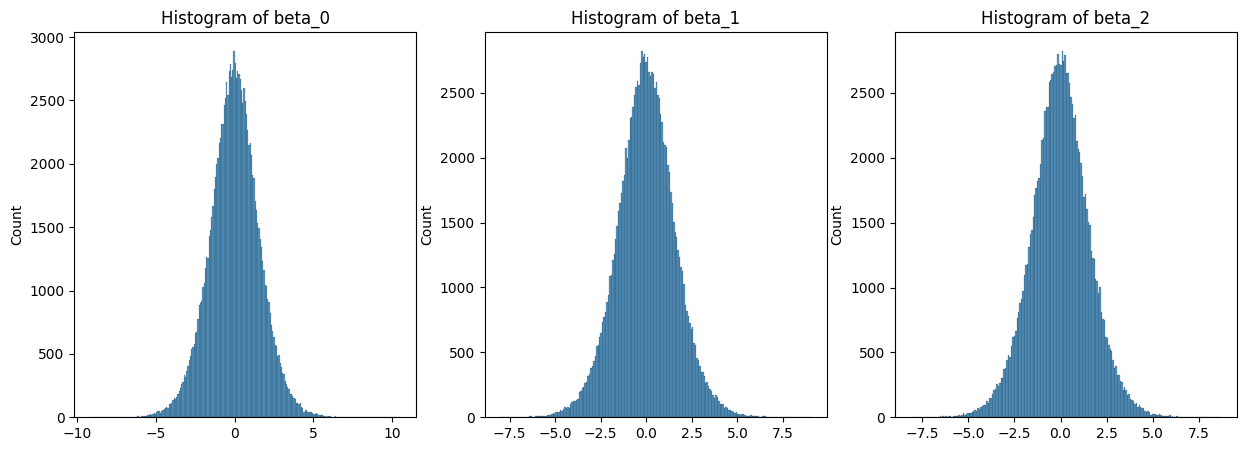

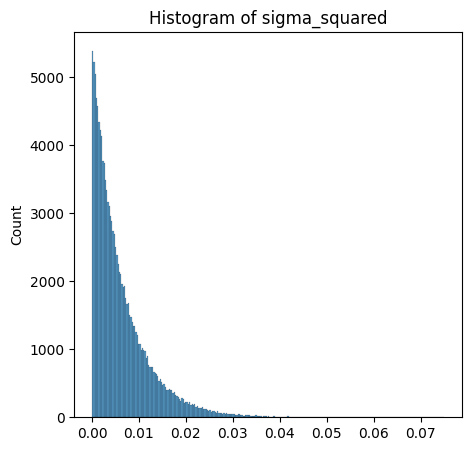

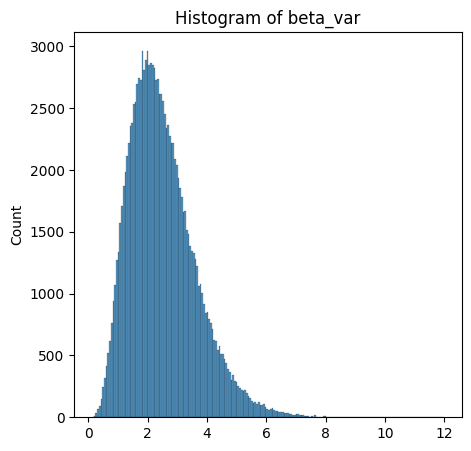

####################################################################################################
Epoch 10


100%|██████████| 500/500 [00:03<00:00, 133.87it/s]


{'X': {'mean': tensor(0.5001), 'variance': tensor(0.0833), 'min': tensor(0.), 'max': tensor(1.0000)}, 'y': {'mean': tensor(-0.0028), 'variance': tensor(2.5036), 'min': tensor(-21.4212), 'max': tensor(13.4608)}, 'beta': {'mean': tensor([ 0.0009, -0.0011, -0.0052]), 'variance': tensor([2.4995, 2.5206, 2.4904]), 'min': tensor([-9.4999, -9.1947, -9.9243]), 'max': tensor([8.5851, 8.8317, 8.9946])}}
Statistics for sigma_squared:
Mean: 0.006214226596057415
Variance: 3.8752015825593844e-05
Min: 1.335397570301211e-07
Max: 0.07245238125324249


Statistics for beta_var:
Mean: 2.50213360786438
Variance: 1.2520843744277954
Min: 0.12788747251033783
Max: 10.989415168762207




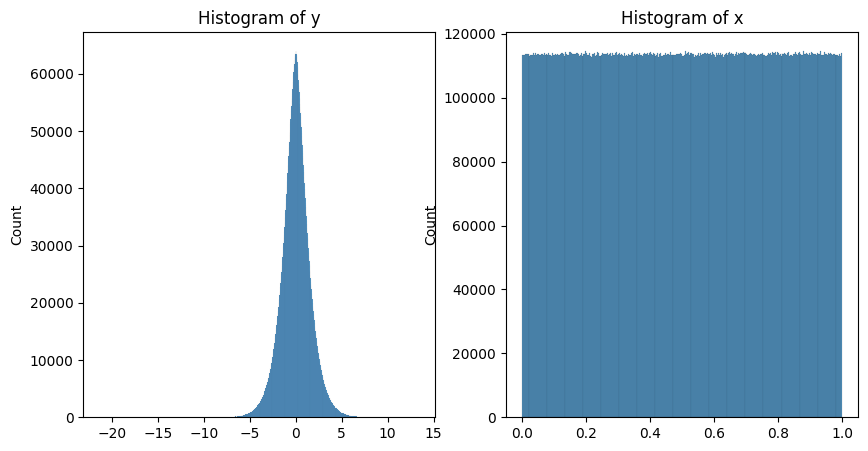

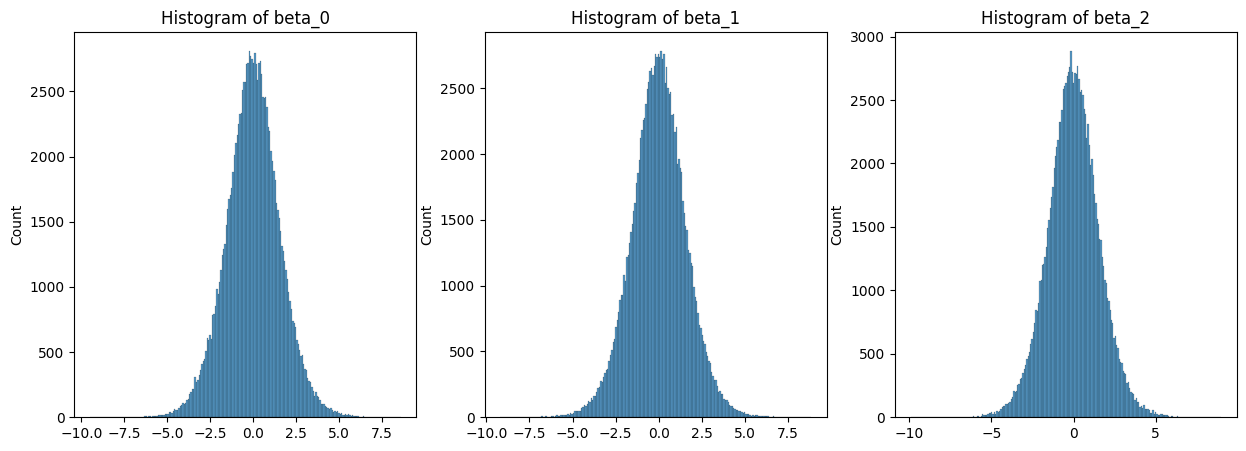

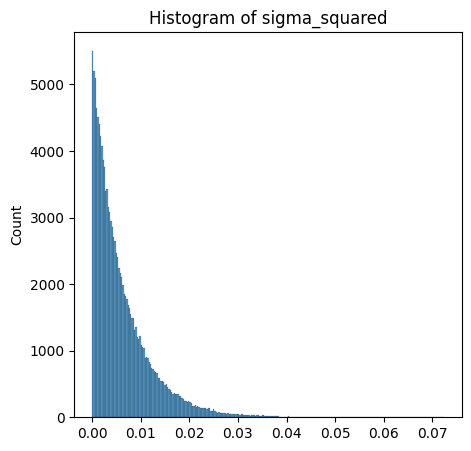

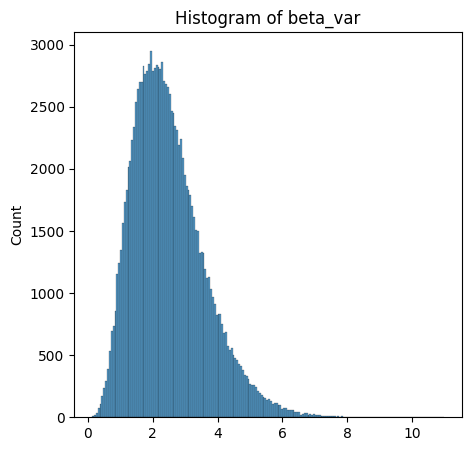

In [28]:
r = data_generator.check_model(
    n_samples_per_epoch=N_SAMPLES_PER_EPOCH,
    batch_size=BATCH_SIZE,
    epochs_to_check = [0, 10],
    used_batch_samples=500
)

In [29]:
r0 = r[0]

In [30]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = 100,
    number_of_batches_per_epoch= N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=True
)

In [31]:
epoch_loader.GenerateDataCurriculum.curriculum.get_params(iter = 1111)

{'a0': 5.0, 'b0': 2.0, 'a1': 1.0, 'b1': 160}